In [67]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [68]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [69]:
NUM_CLASSES = 30

# Dataset reading

In [70]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [71]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [73]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [74]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_6 (Dropout)         (None, 42)                0         
                                                                 
 dense_9 (Dense)             (None, 20)                860       
                                                                 
 dropout_7 (Dropout)         (None, 20)                0         
                                                                 
 dense_10 (Dense)            (None, 10)                210       
                                                                 
 dense_11 (Dense)            (None, 30)                330       
                                                                 
Total params: 1,400
Trainable params: 1,400
Non-trainable params: 0
_________________________________________________________________


In [75]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [76]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [77]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
54/62 [=========================>....] - ETA: 0s - loss: 3.3968 - accuracy: 0.0422
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
62/62 [==============================] - 2s 13ms/step - loss: 3.3912 - accuracy: 0.0446 - val_loss: 3.3351 - val_accuracy: 0.0670
Epoch 2/1000
60/62 [============================>.] - ETA: 0s - loss: 3.2948 - accuracy: 0.0824
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
62/62 [==============================] - 1s 8ms/step - loss: 3.2914 - accuracy: 0.0833 - val_loss: 3.1821 - val_accuracy: 0.0799
Epoch 3/1000
57/62 [==========================>...] - ETA: 0s - loss: 3.1616 - accuracy: 0.0992
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
62/62 [==============================] - 1s 8ms/step - loss: 3.1524 - accuracy: 0.1011 - val_loss: 3.0081 - val_accuracy: 0.1553
Epoch 4/1000
55/62 [=========================>....] - ETA: 0s - loss: 3.0278 - accuracy: 0.1300


In [78]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

21/21 [==============================] - 0s 3ms/step - loss: 0.7846 - accuracy: 0.8182


In [79]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [80]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 225ms/step
[3.56982648e-02 1.13019069e-05 4.60695811e-02 3.70385381e-03
 1.23006433e-01 7.00368956e-02 8.46703610e-12 2.30922590e-11
 4.75865304e-01 4.90032624e-12 2.06681989e-06 4.98530153e-06
 1.98085903e-08 4.57989890e-03 5.76447168e-10 3.82294417e-07
 5.56461471e-17 7.97735155e-02 1.70606654e-05 2.00379334e-18
 4.24486082e-08 3.97494971e-12 1.10875995e-07 1.08725101e-01
 5.11383414e-02 4.50721738e-04 2.41800308e-06 4.76448463e-08
 7.24283920e-04 1.89363214e-04]
8


# Confusion matrix

83/83 [==============================] - 0s 4ms/step


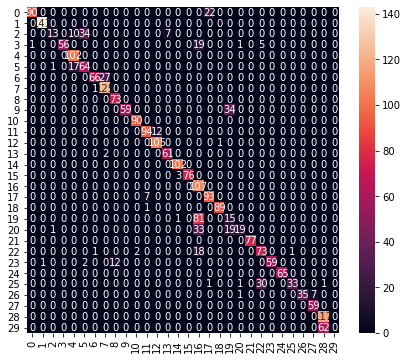

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.80      0.89       112
           1       0.99      1.00      1.00       143
           2       0.87      0.20      0.33        64
           3       1.00      0.68      0.81        82
           4       0.79      1.00      0.88       102
           5       0.64      0.78      0.70        82
           6       0.97      0.71      0.82        93
           7       0.81      0.99      0.89       126
           8       0.86      1.00      0.92        73
           9       1.00      0.63      0.78        93
          10       0.98      1.00      0.99        90
          11       0.92      0.89      0.90       106
          12       0.90      0.99      0.94       106
          13       0.90      0.97      0.93        63
          14       0.96      1.00      0.98       102
          15       1.00      0.96      0.98        79
          16       0.41      1.00      0.59       107
     

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [82]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [83]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/8v/nnrlh0k56f96ddx0kkgz894h0000gn/T/tmp6ny1pknz/assets


INFO:tensorflow:Assets written to: /var/folders/8v/nnrlh0k56f96ddx0kkgz894h0000gn/T/tmp6ny1pknz/assets


7684

# Inference test

In [84]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [85]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [86]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [87]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 64 µs, sys: 9 µs, total: 73 µs
Wall time: 78.9 µs


In [88]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[3.56982648e-02 1.13019178e-05 4.60695401e-02 3.70385381e-03
 1.23006403e-01 7.00368583e-02 8.46703610e-12 2.30922590e-11
 4.75865304e-01 4.90034445e-12 2.06681989e-06 4.98531108e-06
 1.98086294e-08 4.57989471e-03 5.76447168e-10 3.82294417e-07
 5.56459353e-17 7.97735155e-02 1.70606836e-05 2.00380864e-18
 4.24486899e-08 3.97496489e-12 1.10876094e-07 1.08725205e-01
 5.11383489e-02 4.50722815e-04 2.41800558e-06 4.76450310e-08
 7.24284560e-04 1.89363680e-04]
8
